<a href="https://colab.research.google.com/github/MunirahHF/Deployment/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Cross Selling.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())



<ipython-input-1-bcc0d5908c60>:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79138 entries, 0 to 79137
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             79138 non-null  object 
 1   ncodpers               79138 non-null  int64  
 2   ind_empleado           79138 non-null  object 
 3   pais_residencia        79138 non-null  object 
 4   sexo                   79138 non-null  object 
 5   age                    79138 non-null  int64  
 6   fecha_alta             79138 non-null  object 
 7   ind_nuevo              79137 non-null  float64
 8   antiguedad             79137 non-null  float64
 9   indrel                 79137 non-null  float64
 10  ult_fec_cli_1t         97 non-null     object 
 11  indrel_1mes            79137 non-null  float64
 12  tiprel_1mes            79137 non-null  object 
 13  indresi                79137 non-null  object 
 14  indext                 79137 non-null  object 
 15  co

In [ ]:
# Display the first few rows
print(data.head())

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2016-06-28     15889            F              ES    V   56  1995-01-16   
1  2016-06-28   1170544            N              ES    H   36  2013-08-28   
2  2016-06-28   1170545            N              ES    V   22  2013-08-28   
3  2016-06-28   1170547            N              ES    H   22  2013-08-28   
4  2016-06-28   1170548            N              ES    H   22  2013-08-28   

   ind_nuevo  antiguedad  indrel  ... indext  conyuemp canal_entrada indfall  \
0        0.0       256.0     1.0  ...      N         N           KAT       N   
1        0.0        34.0     1.0  ...      N       NaN           KAT       N   
2        0.0        34.0     1.0  ...      N       NaN           KHE       N   
3        0.0        34.0     1.0  ...      N       NaN           KHE       N   
4        0.0        34.0     1.0  ...      N       NaN           KHE       N   

  tipodom cod_prov         nomprov ind_actividad_c

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
ind_nuevo                    1
antiguedad                   1
indrel                       1
ult_fec_cli_1t           79041
indrel_1mes                  1
tiprel_1mes                  1
indresi                      1
indext                       1
conyuemp                 79137
canal_entrada                4
indfall                      1
tipodom                      1
cod_prov                    48
nomprov                     48
ind_actividad_cliente        1
renta                        1
segmento                     8
dtype: int64


k


In [ ]:
data['sexo'].fillna(data['sexo'].mode()[0], inplace=True)
data['cod_prov'].fillna(data['cod_prov'].median(), inplace=True)

In [ ]:

from sklearn.impute import KNNImputer

# Separate the numeric and non numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Apply KNNImputer to numeric columns only
imputer = KNNImputer(n_neighbors=5)
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Handle non numeric columns separately,filling with mode
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

oo

In [ ]:
print(data.describe())


           ncodpers           age     ind_nuevo    antiguedad        indrel  \
count  7.913800e+04  79138.000000  79138.000000  79138.000000  79138.000000   
mean   1.180209e+06     31.715105      0.002881     32.662938      1.120119   
std    4.309012e+04     12.349513      0.053598      4.709025      3.428908   
min    1.588900e+04      4.000000      0.000000      0.000000      1.000000   
25%    1.147453e+06     23.000000      0.000000     30.000000      1.000000   
50%    1.171488e+06     26.000000      0.000000     33.000000      1.000000   
75%    1.227315e+06     37.000000      0.000000     35.000000      1.000000   
max    1.269250e+06    105.000000      1.000000    256.000000     99.000000   

        indrel_1mes  tipodom      cod_prov  ind_actividad_cliente  
count  79138.000000  79138.0  79138.000000           79138.000000  
mean       1.000076      1.0     25.238836               0.419541  
std        0.012314      0.0     13.856780               0.493484  
min        1.000

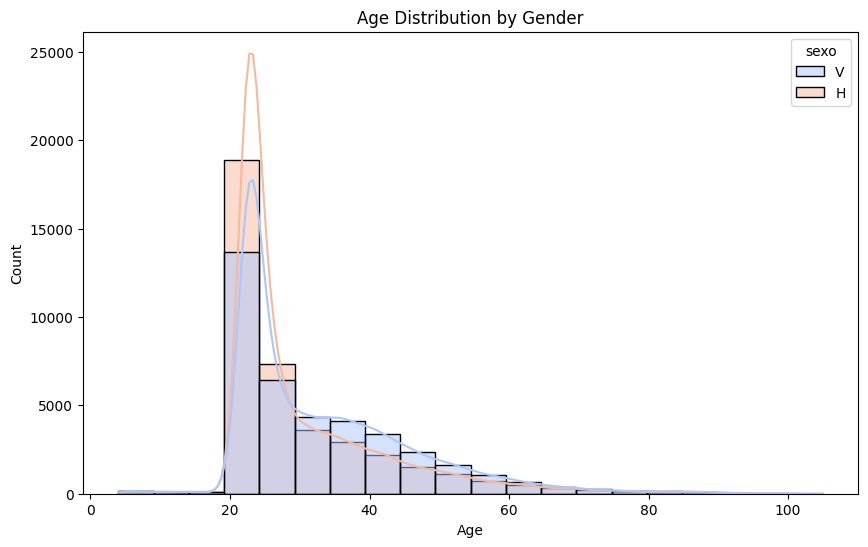

In [ ]:
#Age Distribution by Gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data, x='age', hue='sexo', kde=True, palette='coolwarm', bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-8-84b784c53c4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='segmento', data=data, palette='Set2')


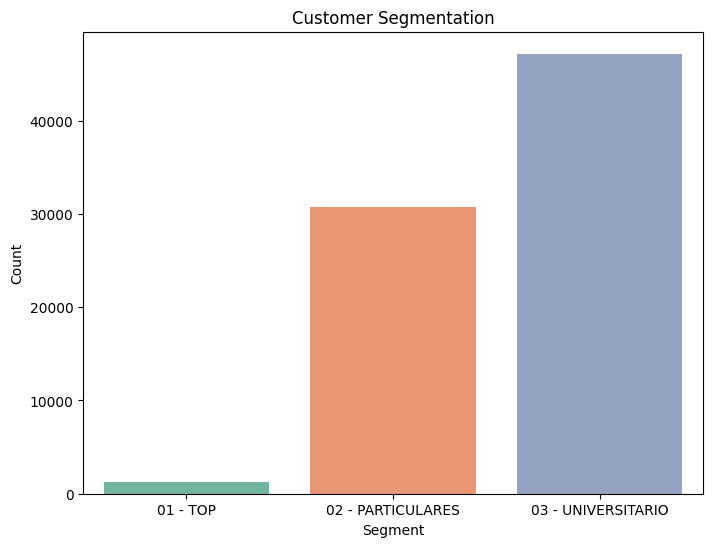

In [ ]:
#Customer Segmentation Analysis
plt.figure(figsize=(8,6))
sns.countplot(x='segmento', data=data, palette='Set2')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

<ipython-input-9-717e7836aae3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ind_actividad_cliente', data=data, palette='viridis')


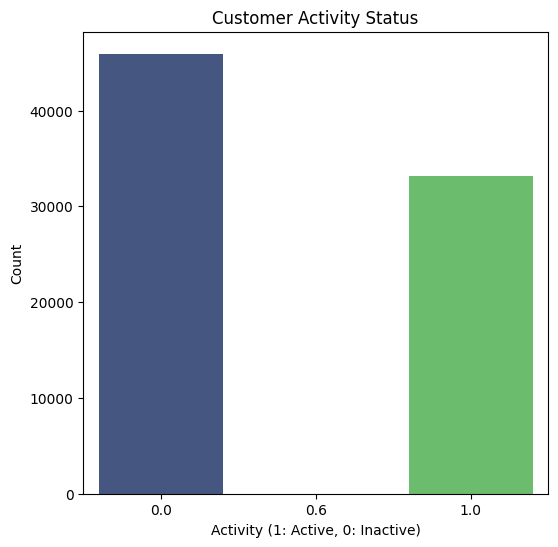

In [ ]:
#Customer Activity
plt.figure(figsize=(6,6))
sns.countplot(x='ind_actividad_cliente', data=data, palette='viridis')
plt.title('Customer Activity Status')
plt.xlabel('Activity (1: Active, 0: Inactive)')
plt.ylabel('Count')
plt.show()